In [1]:
import pickle
import matplotlib.pylab as plt
import numpy as np
import numpy

In [2]:
# SET VALUES IN THIS CELL FOR YOUR RUN (only place you should have to make changes in this notebook)

infile = open("/hpctmp/elechg/GansynthPytorch/sonyGanFork/output/outname_pop_full_test/outname_pop_full_test_losses.pkl",'rb')
stages=[200000, 200000, 200000, 300000, 300000 ]

In [3]:
new_dict = pickle.load(infile)
infile.close()

In [4]:
new_dict[0].keys() # one dictionary entry for each scale

dict_keys(['scale', 'iter', 'Spread_R-F', 'lossD_GP', 'lossD', 'lossG_fake', 'lipschitz_norm', 'lossG_classif', 'lossD_real', 'lossD_classif', 'lossD_Epsilon', 'alpha', 'lossD_fake', 'lossG'])

In [5]:
# first lets concatenate the scales together in to catdict
unsorted_catdict = {}
for k in new_dict[0].keys() :
    if k != 'scale' :    
        unsorted_catdict[k]=[]
        for s in range(len(new_dict)) :    #for each scale
            unsorted_catdict[k]=unsorted_catdict[k]+new_dict[s][k]

# sort so we can compare group plots without going crazy
catdict = dict( sorted(unsorted_catdict.items(), key=lambda x: x[0].lower()) )

In [6]:
if False :
    # plot each measure
    for k in catdict :
        if k != 'iter':
            plt.plot(catdict[k])
            plt.ylabel('loss')
            plt.xlabel('step')
            plt.title(k)
            plt.show()

[  0  59 119 179 239]


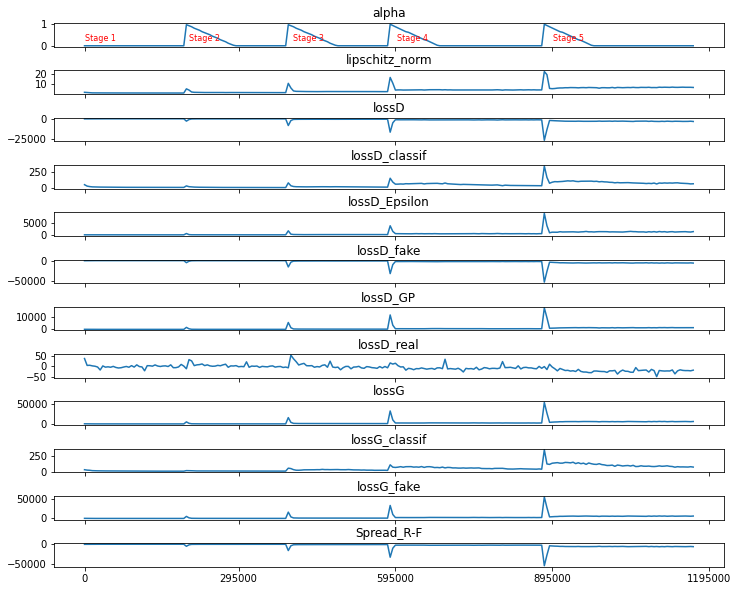

In [7]:
# combine into one fig and add formatting for visualization and copying images elsewhere

totaliters=sum(stages[:5])
totalsteps=len(catdict['iter'])+len(stages) # compensate since each scale drops the last iteration at the end point
#print("total steps is {}".format(totalsteps))
               
numplots=len(catdict)-1 #dont plot 'iter'
fig, ax = plt.subplots(numplots,sharex=True, gridspec_kw={'hspace': 1}, figsize=(12,10))

tstep=numpy.linspace(0, totalsteps, num=5, endpoint=True).astype(int)
print(tstep)
plt.xticks(tstep, tstep*catdict['iter'][0])


cnt=0
ax[cnt].plot(catdict['alpha']) 
ax[cnt].set_title('alpha')
ax[cnt].annotate('Stage 1', (sum(stages[:0]), 0.2), textcoords='data', size=8, color='red')
ax[cnt].annotate('Stage 2', (totalsteps*sum(stages[:1])/totaliters, 0.2), textcoords='data', size=8, color='red')
ax[cnt].annotate('Stage 3', (totalsteps*sum(stages[:2])/totaliters, 0.2), textcoords='data', size=8, color='red')
ax[cnt].annotate('Stage 4', (totalsteps*sum(stages[:3])/totaliters, 0.2), textcoords='data', size=8, color='red')
ax[cnt].annotate('Stage 5', (totalsteps*sum(stages[:4])/totaliters, 0.2), textcoords='data', size=8, color='red')
cnt=1
    
for k in catdict :
    if k != 'iter' and k != 'alpha' :
        ax[cnt].plot(catdict[k]) 
        ax[cnt].set_title(k)
        cnt=cnt+1
        
#print(plt.xticks())